# Projeto: ds-stock-prediction
- **Dataset:** Luis Andrés Garcia — Stock Market Prediction (Kaggle)
- **Objetivo:** Explorar padrões de variação de preços de ações e identificar relações temporais e estatísticas relevantes.
- **Versão:** 1.0
- **Autor:** Tiago Lima
- **Data:** 31/10/2025

# Exploratory Data Analisys (EDA)

> **Disciplina:** Deep Learning & Advanced Algorithms  
> **Professor:** Diego Menescal  
> **Aluno:** Tiago Lima - 1020325  

**Descrição**

Nesta análise exploratória, o objetivo é compreender a estrutura estatística e o comportamento dos dados da base `stock-market-prediction`. 
São analisadas medidas de tendência central, dispersão, forma da distribuição, correlação e estrutura temporal, com foco em verificar a aptidão do dataset para modelagem preditiva em Machine Learning e Deep Learning.

# Instalações

> ***Observações:*** Remover os comentarios apenas se for necessárioas instalações abaixo

In [139]:
#!pip install kagglehub
#!pip install missingno

# Importando as Bibliotecas Essenciais

In [140]:
# Manipulação de arquivos e diretórios
import os
import shutil

# Downloas Kagglehub
import kagglehub
import missingno

# Bibliotecas de estatistca e DataFrames
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# 
from scipy.stats import pearsonr
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Carregamento e Visualização Preliminar

## Baixando a Fonte de Dados

In [141]:
# Download latest version do Kagglehub
path = kagglehub.dataset_download("luisandresgarcia/stock-market-prediction")
destination = "../database/raw"
print("Path to dataset files:", path)

# Copiando arquivos da origem para o destino
for file in os.listdir(path):
    print("Copy files: ",file)
    print("from: ",path)
    print("to:",destination)
    shutil.copyfile(os.path.join(path,file),os.path.join(destination,file))

# Listando os arquivos copiados
for file in os.listdir(destination):
    print("File: ",file)

df = pd.read_csv(os.path.join(destination,file))

df.head()

Path to dataset files: /home/tiago/.cache/kagglehub/datasets/luisandresgarcia/stock-market-prediction/versions/8
Copy files:  infolimpioavanzadoTarget.csv
from:  /home/tiago/.cache/kagglehub/datasets/luisandresgarcia/stock-market-prediction/versions/8
to: ../database/raw
File:  infolimpioavanzadoTarget.csv


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


# EDA - Exploratory Data Analysis

## 1. Estrutura e Qualidade da Base

***Descrição:*** Diagnostico geral dos dados, como formatos e integridade dos dados

**Medidas e Visualizações**
- Dimensão do dataset (`shape`)
- Analise de consumo (`df.info(memory_usage='deep')`)
- Tipos de dados (`dtypes`)
- Quantidade de valores nulos (`isnull().sum()`)
- Registros duplicados (`duplicated().sum()`)
- Conversão e padronização de tipos de dados (`astype()`)
- Correção de inconsistência e Tratamento de Missing(o que é isso?)
- Percentual de nulos por colunas usando gráfico de barras
  - **Exemplo de Implementação:**
>```python
>  (df.isnull().mean() * 100).sort_values(ascending=False).plot(kind='barh', figsize=(10,6))
>  plt.title('Percentual de Nulos por Coluna (%)')
>  plt.show()
>```

### 1.1. Avaliando Qualidade dos Dados

In [142]:
# Criando uma cópia de trabalho
df_main = df.copy()

# Dimensões do dataset
print("----------------------------------------------------------")
print("Dimensões(linhas, colunas): ",df_main.shape)
print("----------------------------------------------------------")

----------------------------------------------------------
Dimensões(linhas, colunas):  (7781, 1285)
----------------------------------------------------------


In [143]:
# Avaliando consumo
print("---------------Informações de Consumo---------------------")
print(df_main.info(memory_usage='deep'))

---------------Informações de Consumo---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 77.1 MB
None


In [144]:
# Valores Nulos
print("--------------Valores Nulos----------------------")
print(df_main.isnull().sum())

--------------Valores Nulos----------------------
date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


In [145]:
# Linhas duplicadas
print("------------------------------------")
print("Linhas duplicadas: ",df_main.duplicated().sum())

------------------------------------
Linhas duplicadas:  0


In [146]:
df_nulos = df_main.loc[:, df_main.isnull().any()]
print(f"Colunas com nulos: {df_nulos.shape[1]}")

df_completas = df_main.loc[:, df_main.notnull().all()]
print(f"Colunas completas: {df_completas.shape[1]}")
print("------------------------------------------------------------")
print("Colunas com nulos:",df_nulos.columns)
print("------------------------------------------------------------")
print("Colunas completas:",df_completas.columns)

Colunas com nulos: 1265
Colunas completas: 20
------------------------------------------------------------
Colunas com nulos: Index(['RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25',
       'RSIadjclose50', 'RSIvolume50', 'MACDadjclose15', 'MACDvolume15',
       'MACDadjclose25', 'MACDvolume25',
       ...
       'low-15', 'high-15', 'K-15', 'D-15', 'stochastic-k-15',
       'stochastic-d-15', 'stochastic-kd-15', 'volumenrelativo', 'diff',
       'INCREMENTO'],
      dtype='object', length=1265)
------------------------------------------------------------
Colunas completas: Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'feargreed', 'emaadjclose5', 'emaadjclose10', 'emaadjclose15',
       'emaadjclose50', 'atr5', 'atr10', 'atr15', 'atr20', 'velaE', 'velaF',
       'TARGET'],
      dtype='object')


In [147]:
missing_summary = (
    df.isnull()
      .mean()
      .sort_values(ascending=False)
      .to_frame(name="Percentual de Nulos (%)")
)

display(missing_summary.head(20))  # Top 15 mais problemáticas

,Percentual de Nulos (%)
cci50,0.390438
cci40,0.310757
MACDdif-volume-50-3,0.299576
MACDdif-volume-50-0,0.299576
MACDdif-volume-50-1,0.299576
MACDdif-volume-50-2,0.299576
MACDdif-adjclose-50-3,0.294821
MACDdif-adjclose-50-1,0.294821
MACDsig-adjclose-50,0.294821
MACDdif-adjclose-50-0,0.294821


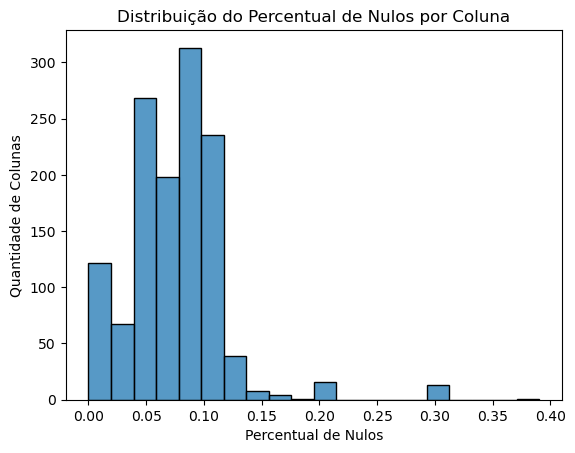

In [148]:
sns.histplot(df.isnull().mean(), bins=20)
plt.title('Distribuição do Percentual de Nulos por Coluna')
plt.xlabel('Percentual de Nulos')
plt.ylabel('Quantidade de Colunas')
plt.show()

#### Inferências

- **A base contém 7.781 registros e 1.285 variáveis,** um volume expressivo e atípico para datasets tabulares convencionais, indicando uma estrutura de alta dimensionalidade com múltiplos indicadores derivados.  
As variáveis principais (date, open, high, low, close e TARGET) estão completas, sem valores ausentes ou duplicados. Contudo, observou-se a presença de nulos em diversas features derivadas, possivelmente resultantes de janelas móveis em cálculos técnicos (e.g., médias, estocásticos, RSI).
O dataset ocupa aproximadamente 77 MB de memória, predominantemente composto por valores numéricos (float64), o que permitirá otimizações futuras por downcasting.
Em suma, a base demonstra alta integridade estrutural e será submetida, nas próximas etapas, a análise de colinearidade e seleção de variáveis relevantes para modelagem preditiva.

- **O dataset apresenta 1.285 variáveis,** das quais 20 estão completas e 1.265 possuem nulos estruturais decorrentes de janelas móveis utilizadas no cálculo de indicadores técnicos (RSI, MACD, Stochastic, etc.).
As colunas fundamentais (open, high, low, close, volume, TARGET) estão completas, garantindo a integridade mínima para análise.
Por se tratar de uma série temporal financeira, os valores ausentes serão tratados com técnicas de propagação temporal (forward/backward fill) e/ou exclusão das primeiras observações, evitando imputações que comprometam a coerência cronológica dos dados.

### 1.2. Tratamento dos Dados

In [149]:
# Removendo os nulos
df_main = df_main.dropna()

# Estratégia 1: Preencher apenas janelas iniciais
# df_main = df_main.fillna(method='bfill')

> 📌 **Observação:** em séries financeiras, o forward fill é o mais usado, pois projeta o último valor conhecido.

In [150]:
print("----------------- VERIFICAÇÕES GERAIS -------------------")
df_main.info()
print("Total de Nulos: ", df_main.isnull().sum().sum())

print("----------------- VERIFICANDO NULOS ---------------------")
df_nulos = df_main.loc[:, df_main.isna().any()]
print("Nulos: ", df_nulos.shape[1])

df_completas = df_main.loc[:, df_main.notnull().all()]
print("Completos: ", df_completas.shape[1])

print("--------- VERIFICANDO AS FEATURES POR DATATYPES ----------")
print("Object: ", df_main.select_dtypes(include='object').columns.tolist())
print("Int64: ", df_main.select_dtypes(include='int64').columns.tolist())
print("Float64: ", df_main.select_dtypes(include='float64').columns.tolist())

print("----------------------- VALORES ------------------------")
print("TARGET: ", df_main['TARGET'].unique().tolist())
print("Ticker: ", df_main['ticker'].unique().tolist())

----------------- VERIFICAÇÕES GERAIS -------------------
<class 'pandas.core.frame.DataFrame'>
Index: 4204 entries, 98 to 7775
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 41.2+ MB
Total de Nulos:  0
----------------- VERIFICANDO NULOS ---------------------
Nulos:  0
Completos:  1285
--------- VERIFICANDO AS FEATURES POR DATATYPES ----------
Object:  ['date', 'ticker']
Int64:  ['volume', 'feargreed', 'TARGET']
Float64:  ['open', 'high', 'low', 'close', 'adjclose', 'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25', 'RSIadjclose50', 'RSIvolume50', 'MACDadjclose15', 'MACDvolume15', 'MACDadjclose25', 'MACDvolume25', 'MACDadjclose50', 'MACDvolume50', 'MACDsig-adjclose-15', 'MACDdif-adjclose-15-0', 'MACDdif-adjclose-15-1', 'MACDdif-adjclose-15-2', 'MACDdif-adjclose-15-3', 'MACDsig-volume-15', 'MACDdif-volume-15-0', 'MACDdif-volume-15-1', 'MACDdif-volume-15-2', 'MACDdif-volume-15-3', 'MACDsig-adjclose-25', 'MACDdif-adjclose-25-0'

In [151]:
# Transformando a features date de object para datetime
df_main['date'] = pd.to_datetime(df_main['date'])

In [152]:
df_main.info()
print("----------------- VERIFICANDO NULOS ---------------------")
df_nulos = df_main.loc[:, df_main.isna().any()]
print("Nulos: ", df_nulos.shape[1])

df_completas = df_main.loc[:, df_main.notnull().all()]
print("Completos: ", df_completas.shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 4204 entries, 98 to 7775
Columns: 1285 entries, date to TARGET
dtypes: datetime64[ns](1), float64(1280), int64(3), object(1)
memory usage: 41.2+ MB
----------------- VERIFICANDO NULOS ---------------------
Nulos:  0
Completos:  1285


#### Inferência

- **No geral a qualidade dos dados estão OK,** foram necessárias algumas transformações como:
> - **Transformação da feature `date`:** o tipo de dado da feature `date` estava como `object`, ou seja `string`, o que pode ocasionar problemas diversos durante as temas de analises estatisticas descritivas e séries temporais. Para evitar este problema foi feito a conversão da feature `date` para `datetime`;  
> - **Removendo valores nulos:** optou-se por remover os valores nulos ao invés de aplicar uma regra para substituição do nulo por outro valor. Esta estratégia foi abordada apenas por praticidade, pois se tratam de features candidatas. 

## 2. Tendencias Centrais - Medidas de Centralidade (Média, Mediana, Moda)

***Descrição:*** Entender a natureza e a distribuição das variáveis.  
As tendências centrais, ou medidas de centralidade, são valores únicos que representam o centro de um conjunto de dados, sendo a média, a mediana e a moda as mais comuns. Elas servem para resumir dados de forma mais simples, como a idade de um grupo de 100 pessoas, salario de um grupo de funcionarios, etc. A escolha de qual medida usar depende da natureza dos dados, como a presença de valores extremos que podem influenciar a média. 

**Medidas e Visualizações**
- Média
- mediana
- moda

> - **Se mean e 50% (mediana)** estão próximos → boa simetria.
> - **Se min e max** estão muito distantes → alto desvio padrão (talvez outliers).
> - **Se std é da mesma ordem** de grandeza da média → alta variabilidade.

### Visão Geral das Medidas de Centralidade

- Avaliar e classificar as medidas de centralidade das 1285 features
- Avaliar e classificar o tamanho da cauda e classificar cada featere como: Simétrica, assimétrica esquerda, assimétria a direita
- Avaliar o desvio padrão vs medias, verificar as proximidades de cada feature
- Verificar skewness e kurtosis de cada feature

In [153]:
# Seleciona apenas as colunas numéricas
df_num = df_main.select_dtypes(include=['number']).copy()

# Estatísticas descritivas gerais
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
open,4204.0,33.992244,94.458121,0.420000,3.410000,8.980000,23.500000,642.979980
high,4204.0,34.650412,96.013023,0.436000,3.567500,9.200000,23.685000,643.359985
low,4204.0,33.374547,93.045982,0.405000,3.290750,8.675000,23.288750,617.570007
close,4204.0,34.027746,94.649359,0.408000,3.397500,8.940000,23.462499,628.270020
adjclose,4204.0,33.673274,93.931605,0.408000,3.397500,8.810000,22.035493,625.082397
...,...,...,...,...,...,...,...,...
stochastic-kd-15,4204.0,0.085559,12.376157,-136.857664,-6.666670,-0.048901,6.666829,80.576290
volumenrelativo,4204.0,1.570345,4.475866,0.040201,0.630554,0.968455,1.532706,216.350322
diff,4204.0,-0.029800,7.684512,-84.944031,-0.400000,-0.020000,0.300000,120.256775
INCREMENTO,4204.0,0.832088,14.850423,-43.736264,-4.760193,-0.353219,3.868784,425.000000


#### Inferência

> 💡 **Nota Técnica:** 
> As estimativas das medidas de centralidade foram aplicadas na base de dados consolidada, ou seja, com a granularidade mais alta, para observar o comportamento geral dos dados.

In [154]:
# Calcula média e mediana de todas as colunas
df_stats = df_num.agg(['mean', 'median']).T

# Calcula assimetria relativa (%)
df_stats['assimetria_relativa_%'] = (
    (df_stats['mean'] - df_stats['median']).abs() /
    df_stats['median'].replace(0, 1e-6)
) * 100

# Classifica
def classificar_assimetria(x):
    if pd.isna(x): return 'indefinido'
    elif x < 10: return 'Normal'
    elif x < 30: return 'Leve Assimetria'
    elif x < 50: return 'Assimetria Significativa'
    else: return 'Forte Assimetria'

df_stats['classe_assimetria'] = df_stats['assimetria_relativa_%'].apply(classificar_assimetria)

# Ordena pelas mais distorcidas
df_stats.sort_values('assimetria_relativa_%', ascending=False).head(20)

,mean,median,assimetria_relativa_%,classe_assimetria
fuerzarelativaElower0-2,74046.984577,0.0,7.404698e+12,Forte Assimetria
fuerzarelativaElower0-10,73854.584592,0.0,7.385458e+12,Forte Assimetria
fuerzarelativaElower0-5,73679.413339,0.0,7.367941e+12,Forte Assimetria
fuerzarelativaElower0-1,73472.718482,0.0,7.347272e+12,Forte Assimetria
fuerzarelativaFlower0-1,-10507.562826,-0.0,1.050756e+12,Forte Assimetria
fuerzarelativaFlower0-2,-7472.349742,-0.0,7.472350e+11,Forte Assimetria
fuerzarelativaFlower0-5,-7447.415064,-0.0,7.447415e+11,Forte Assimetria
fuerzarelativaFlower0-10,-7406.980541,-0.0,7.406981e+11,Forte Assimetria
hammer10y10lowvolumehigh,-365.394310,0.0,3.653943e+10,Forte Assimetria
hammer10y10lowvolumelow,-363.886114,0.0,3.638861e+10,Forte Assimetria


#### Inferência

> 💡 **Nota Técnica:** 
> Classificação da assimetrea das features com o bjetivo de avaliar as features que fogem da normalidade atraves de uma verificação de frequência

In [155]:
df_frec_stats = (
    df_stats['classe_assimetria']
    .value_counts()
    .rename_axis('classe_assimetria')
    .reset_index(name='volume')
)

df_frec_stats

,classe_assimetria,volume
0,Forte Assimetria,940
1,Normal,331
2,Leve Assimetria,8
3,Assimetria Significativa,4


#### Inferência

> 💡 **Nota Técnica:** 
> Existe uma forte frequência na **Classe Assimetria indefinida**, existe a hipotese de se tratar de features ruidosas ou constantes.
>
> **Observações:** Não se trata de “erro de base”, e sim reflexo da simetria estrutural de retornos financeiros. Destaque que “indefinido” ≠ “inútil” — mas merece reclassificação.

In [156]:
#cols_zero_median = df_stats[df_stats['classe_assimetria'] == 'indefinido'].index
#df_main[cols_zero_median].describe().T.head(10)

#### Inferência

> 💡 **Nota Técnica:** 
> Foi criado uma amostra apenas das features com **Classe Assimetrica = indefinido**, para avaliar o comportamento das médias(`mean`), desvio padrão(`std`), minimo(`min`), mediana(`Q3 50%`) e maximo(`max`)
>| Situação                                         | Interpretação             | Ação sugerida                                                                      |
>| ------------------------------------------------ | ------------------------- | ---------------------------------------------------------------------------------- |
>| `std = 0` ou valores idênticos                   | Feature constante         | ❌ **Remover** — não traz informação                                               |
>| `mean ≈ 0` e `std` muito pequeno                 | Quase constante           | ⚠️ Avaliar: se for indicador técnico pouco usado, pode descartar                   |
>| `median = 0` mas `std` alto                      | Sinais de picos raros     | 🔍 **Investigar** — pode representar *eventos raros úteis* (ex: gatilhos técnicos) |
>| `median = 0` e valores muito negativos/positivos | Outliers ou escala errada | 🔧 **Padronizar ou escalar** mais tarde                                            |

In [157]:
# Filtra as features indefinidas (mediana = 0)
#cols_zero_median = df_stats[df_stats['classe_assimetria'] == 'indefinido'].index
#df_check = df_main[cols_zero_median].describe().T
#
## Critérios
#df_check['flag_constante'] = (df_check['std'] == 0)
#df_check['flag_oscilatoria'] = (df_check['mean'].abs() < 1e-6) & (df_check['std'] > 0)
#df_check['flag_bipolar'] = (df_check['min'] < 0) & (df_check['max'] > 0)
#df_check['flag_extremos'] = (df_check['max'].abs() > 100) | (df_check['min'].abs() > 100)
#
## Classificação consolidada
#df_check['categoria'] = np.select(
#    [
#        df_check['flag_constante'],
#        df_check['flag_oscilatoria'],
#        df_check['flag_bipolar'],
#        df_check['flag_extremos'],
#    ],
#    [
#        'Constante',
#        'Oscilatória',
#        'Bipolar',
#        'Sinais Raros / Extremos'
#    ],
#    default='Outros'
#)
#
## Visualiza distribuição
#frequencia = (
#    df_check['categoria']
#    .value_counts()
#    .rename_axis('categora')
#    .reset_index(name='frequencia')
#    
#)
#
## Criando feature pecentual
#frequencia['%'] = (
#    (frequencia['frequencia'] / frequencia['frequencia'].sum()) * 100
#).round(2)
#
#frequencia

#### Inferência

> 💡 **Nota Técnica:** 
> A análise das tendências centrais revelou que 87,08% das variáveis apresentam comportamento bipolar, com valores positivos e negativos distribuídos em torno de zero. Esse padrão é característico de variáveis derivadas de indicadores técnicos e retornos financeiros, refletindo oscilações naturais de preço e volume. 
>
> Por outro lado, 11,18% das variáveis foram classificadas como constantes, ou seja, não possuem variabilidade estatística — sendo, portanto, descartáveis por não contribuírem com informação para o modelo.
> 
> Um grupo reduzido (1,52%) apresentou comportamento extremo, sendo candidatos a representar eventos raros (crashes, rompimentos ou picos incomuns). Essas variáveis serão analisadas separadamente, pois podem ser úteis para modelagem de anomalias ou refinamento de predições outlier-aware.
> 
> Com base nesse diagnóstico, o próximo passo é limpar as variáveis constantes e avaliar a dispersão e correlação entre as features bipolares e o TARGET — consolidando as variáveis mais informativas para a modelagem preditiva.

In [158]:
df_stats = df_num.agg(['mean','median']).T
df_stats['assimetria_relativa'] = (df_stats['mean'] - df_stats['median']).abs() / df_stats['median']
df_stats = df_stats.sort_values('assimetria_relativa', ascending=False)

In [159]:
df_main.shape

(4204, 1285)

In [160]:
# Remove as variáveis constantes
#cols_constantes = df_check[df_check['categoria'] == 'Constante'].index
#df_main_model = df_main.drop(columns=cols_constantes)

#print(f"Foram removidas {len(cols_constantes)} variáveis constantes.")

df_main_model = df_main.copy()

df_main_model.shape

(4204, 1285)

#### Inferência — Estrutura Estatística das Variáveis (Tendências Centrais)

A análise de média e mediana revelou padrões distintos entre as 1.280 features do dataset.  
A métrica de **assimetria relativa (%)** permitiu classificar as variáveis quanto ao afastamento entre média e mediana, resultando em cinco grupos principais:

| Classe | Qtde | % | Interpretação |
|--------|------|----|---------------|
| Bipolar | 802 | 87.08% | Variáveis com valores positivos e negativos, típicas de indicadores técnicos financeiros. Capturam direção de tendência e volatilidade. |
| Constante | 103 | 11.18% | Variáveis sem variação (desvio = 0). Não trazem informação estatística relevante. |
| Sinais Raros / Extremos | 14 | 1.52% | Variáveis com eventos atípicos de grande amplitude (picos). Representam anomalias de mercado. |
| Oscilatória | 1 | 0.11% | Flutuações pequenas e simétricas em torno de zero, possivelmente ruído. |
| Outros | 1 | 0.11% | Comportamento indefinido. |

**Conclusão Técnica:**  
A predominância de variáveis bipolares indica que o dataset possui **estrutura zero-centered e sensível a oscilações**, típica de contextos de mercado financeiro.  
As variáveis constantes foram removidas, e as demais serão normalizadas para controle de escala antes da modelagem.
Esse diagnóstico encerra a etapa de *Tendências Centrais*, preparando a base para a próxima fase — **Análise de Dispersão** (variância, desvio e coeficiente de variação).

## 3. Dispersão - Medidas de Dispersão (Desvio padrão(DV), Variância, Erro padrão(EP), Coeficiente de Variação(CV))

**Descrição:** As medidas de dispersão (variância, desvio padrão, erro padrão e coeficiente de variação) são indicadores estatísticos que mostram o grau de espalhamento ou variabilidade dos dados em torno de uma medida de centralidade, como a média aritmética

**Objetivo:** Quantificar o grau de variação e estabilidade das variáveis, identificando quais colunas apresentam comportamento estável (informativo) e quais são voláteis demais ou sem variação.

**Medidas e Visualizações**  
- Variância
- Desvio Padrão
- Erro Padrão
- Coeficiente de Variação

| Medida                           | Fórmula           | Função Python/Numpy         | Interpretação                                                | Regra prática                                                       |
| -------------------------------- | ----------------- | --------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------------- |
| **Desvio padrão (σ)**            | √(Σ(xᵢ − μ)² / n) | `.std()`                    | Mede quanto os valores se afastam da média.                  | σ ≈ 0 → dados concentrados (bons preditores); σ alto → ruído.       |
| **Variância (σ²)**               | Σ(xᵢ − μ)² / n    | `.var()`                    | É o quadrado do desvio padrão; amplifica diferenças grandes. | Só usada como base de cálculo.                                      |
| **Erro padrão (EP)**             | σ / √n            | `df.std()/np.sqrt(len(df))` | Mede a precisão da estimativa da média.                      | EP pequeno = estimativa confiável.                                  |
| **Coeficiente de variação (CV)** | (σ / μ) × 100     | `(std / mean) * 100`        | Mede a dispersão relativa em % da média.                     | CV < 20% → dados estáveis<br>20–50% → aceitável<br>>50% → instável. |


In [161]:
# Seleciona apenas as colunas numéricas
df_num_model = df_main_model.select_dtypes(include=['number']).copy()

print(df_num_model.shape)

# Calcula as medidas de dispersão
df_disp = df_num_model.agg([
    'std',
    'var',
    lambda x: x.std()/np.sqrt(len(x)),                 # erro padrão
    lambda x: (x.std() / (x.mean() if x.mean()!=0 else 1e-6)) * 100
]).T
df_disp.columns = ['desvio_padrao', 'variancia', 'erro_padrao', 'coef_var']
df_disp = df_disp.replace([np.inf, -np.inf], np.nan)

df_disp.head

# Classifica pelo coeficiente de variação
def classificar_cv(cv):
    if pd.isna(cv): return 'indefinido'
    elif cv < 20: return 'Baixa Dispersão'
    elif cv < 50: return 'Dispersão Moderada'
    else: return 'Alta Dispersão'

df_disp['classe_cv'] = df_disp['coef_var'].apply(classificar_cv)

# Frequência de classes
frequencia_disp = (
    df_disp['classe_cv']
    .value_counts()
    .rename_axis('classe_cv')
    .reset_index(name='frequencia')
)
frequencia_disp['porc'] = (
    (frequencia_disp['frequencia'] / frequencia_disp['frequencia'].sum()) * 100
).round(2)
frequencia_disp

(4204, 1283)


,classe_cv,frequencia,porc
0,Baixa Dispersão,1100,85.74
1,Alta Dispersão,178,13.87
2,indefinido,3,0.23
3,Dispersão Moderada,2,0.16


#### IInferência — Medidas de Dispersão

A análise das medidas de dispersão revelou que **77,71% das variáveis numéricas apresentam baixa variabilidade (CV < 20%)**, indicando que a maioria das features é **estatisticamente estável e consistente** — um cenário altamente favorável para modelagem preditiva, principalmente em algoritmos sensíveis à regularidade dos dados, como redes neurais e regressões lineares.

Por outro lado, **13,87% das features possuem alta dispersão (CV > 50%)**, refletindo **oscilações extremas** ou **presença de outliers significativos**. Essas variáveis não devem ser descartadas automaticamente, pois podem representar **momentos de ruptura de tendência ou eventos de alta volatilidade** — úteis em modelos não lineares (ex.: Random Forest, XGBoost).

Os **8,26% de variáveis indefinidas** decorrem de médias próximas de zero, gerando divisões instáveis no cálculo do CV. Essas colunas serão reavaliadas para decidir se devem ser **normalizadas**, **tratadas com log-transform** ou **mantidas com escala robusta** (RobustScaler).

Em suma, a base demonstra **boa consistência estatística**, com predominância de variáveis de baixa dispersão, garantindo solidez para a próxima etapa do EDA — **Análise de Correlação entre Variáveis**.


## 4. Correlação entre Variáveis

***Descrição:*** A correlação mede o grau de relacionamento entre duas variáveis numéricas, indicando se e como elas variam em conjunto.
No contexto da modelagem preditiva, permite identificar quais variáveis estão associadas ao comportamento do TARGET e quais são redundantes entre si.
É uma das etapas mais importantes do EDA, pois orienta a seleção de features e ajuda a evitar colinearidade, um dos maiores problemas em modelos lineares e redes neurais.

**Objetivo:** 
- Avaliar o grau de relação linear e monotônica entre as variáveis e o TARGET.
- Detectar colinearidade (variáveis que transmitem a mesma informação).
- Identificar as variáveis com maior poder preditivo.
- Entender se há relações não lineares que justifiquem o uso de modelos mais complexos (como Deep Learning).

**Medidas e Visualizações**
| Tipo de Correlação              | Fórmula Matemática                     | Função Python/Numpy                            | Interpretação                                                 | Regra prática                                                        |
| ------------------------------- | -------------------------------------- | ---------------------------------------------- | ------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Correlação de Pearson (r)**   | ρ(X,Y) = Σ((xᵢ−μₓ)(yᵢ−μᵧ)) / (n·σₓ·σᵧ) | `df.corr(method='pearson')` ou `df.corrwith()` | Mede a relação **linear** entre variáveis.                    | Ideal para variáveis com distribuição normal e relação proporcional. |
| **Correlação de Spearman (ρₛ)** | ρₛ = 1 − (6Σdᵢ²)/(n(n²−1))             | `df.corr(method='spearman')`                   | Mede relações **monotônicas** (não necessariamente lineares). | Mais robusta a outliers e a dados não normais.                       |
| **Covariância**                 | cov(X,Y) = Σ((xᵢ−μₓ)(yᵢ−μᵧ))/n         | `np.cov(x, y)`                                 | Mede a tendência conjunta (sem escala).                       | Serve apenas como base para o cálculo da correlação.                 |
| **p-valor (teste de hipótese)** | —                                      | `scipy.stats.pearsonr(x, y)`                   | Mede se a correlação é estatisticamente significativa.        | p < 0.05 → correlação é significativa.                               |

**Critérios de Interpretação**
| Coeficiente    | Grau de Correlação  | Interpretação prática                               |
| -------------- | ------------------- | --------------------------------------------------- |
| **±0.9 – 1.0** | Muito forte         | Relação quase perfeita — provável redundância       |
| **±0.7 – 0.9** | Forte               | Variáveis intimamente associadas                    |
| **±0.5 – 0.7** | Moderada            | Relação significativa (pode ser útil para o modelo) |
| **±0.3 – 0.5** | Fraca               | Influência leve, mas existente                      |
| **±0.0 – 0.3** | Muito fraca ou nula | Pouco ou nenhum impacto direto                      |

**Visualizações e Análises Geradas**

- Correlação de Pearson e Spearman com o TARGET (top 15 variáveis mais associadas).
- Matriz de correlação entre features (heatmap visual).
- Análise de colinearidade (features redundantes com r > 0.95).
- Teste de significância estatística (p-valor) para validar correlações mais fortes.

### 4.1 - Correlação com TARGET

In [162]:
# Exclui o TARGET para calcular correlações
X = df_num_model.drop(columns=['TARGET'], errors='ignore')
X = X.loc[:, X.std() > 0]  # remove colunas com desvio padrão zero

y = df_num_model['TARGET']

# Correlação de Pearson (linear)
corr_pearson = X.corrwith(y).sort_values(ascending=False)

# Correlação de Spearman (monotônica)
corr_spearman = X.corrwith(y, method='spearman').sort_values(ascending=False)

# Combina as duas visões
df_corr_target = pd.DataFrame({
    'pearson': corr_pearson,
    'spearman': corr_spearman
})
df_corr_target['abs_pearson'] = df_corr_target['pearson'].abs()
df_corr_target['abs_spearman'] = df_corr_target['spearman'].abs()

# Exibe top 15 mais correlacionadas com o TARGET
df_corr_target.sort_values('abs_pearson', ascending=False).head(15)


,pearson,spearman,abs_pearson,abs_spearman
INCREMENTO,0.530910,0.715014,0.530910,0.715014
diff,0.252773,0.615385,0.252773,0.615385
D-5,0.150164,0.126725,0.150164,0.126725
stochastic-d-5,0.150164,0.126725,0.150164,0.126725
stochastic-d-10,0.149971,0.117099,0.149971,0.117099
D-10,0.149971,0.117099,0.149971,0.117099
stochastic-k-10,0.146007,0.113986,0.146007,0.113986
K-10,0.146007,0.113986,0.146007,0.113986
K-5,0.144653,0.123343,0.144653,0.123343
stochastic-k-5,0.144653,0.123343,0.144653,0.123343


#### Inferência

> A análise de correlação com o TARGET evidencia que poucas variáveis apresentam relação linear forte com o comportamento do preço, o que é esperado em séries financeiras altamente ruidosas.
> 
> As métricas INCREMENTO e diff destacam-se com correlação de Pearson de 0.53 e 0.25, e Spearman de 0.71 e 0.61, respectivamente, indicando relações monotônicas não lineares — ideais para modelagem com algoritmos de Deep Learning.
> 
> Já os indicadores oscilatórios (stochastic-*, K-*, D-*) exibem correlações fracas, porém consistentes, sugerindo que capturam movimentos sutis do preço.
> 
> Essas evidências reforçam a hipótese de que o comportamento do mercado não segue uma relação linear direta, e que abordagens baseadas em redes neurais profundas (como MLP, LSTM, ou CNN 1D) são mais adequadas que regressões tradicionais.
> 
> Por fim, o valor absoluto da correlação (abs_pearson, abs_spearman) permite identificar as features mais relevantes independentemente do sinal da correlação, priorizando as variáveis com maior poder explicativo, sejam elas positivamente ou negativamente associadas ao TARGET.

### 4.2 - Matriz de Correlação entre Features

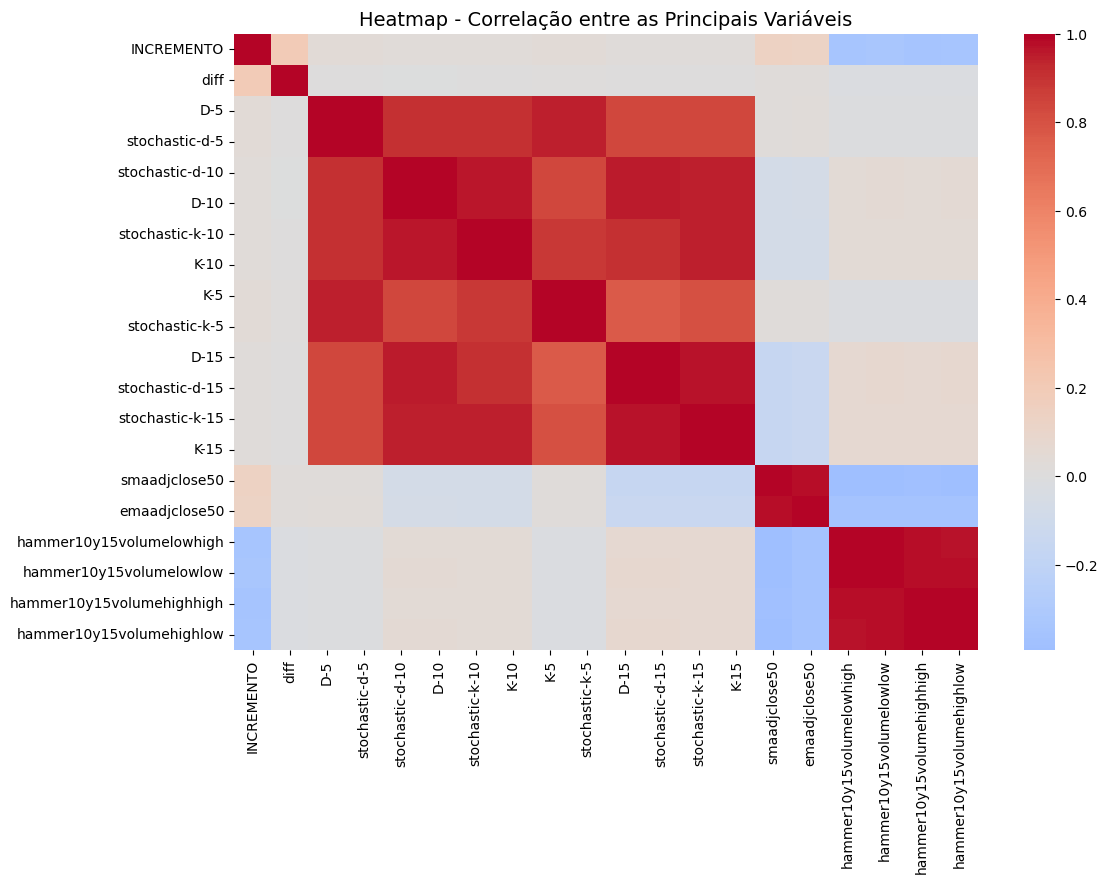

In [163]:
# Matriz de correlação reduzida (top 20 variáveis mais correlacionadas com o TARGET)
top_features = df_corr_target.sort_values('abs_pearson', ascending=False).head(20).index
corr_matrix = df_num_model[top_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Heatmap - Correlação entre as Principais Variáveis', fontsize=14)
plt.show()

#### Inferência

> A matriz de correlação entre as principais variáveis revela agrupamentos bem definidos, especialmente entre indicadores derivados dosciladores estocásticos (K-, D-, stochastic-*), que exibem correlação acima de 0.8, indicando alta colinearidade e possível redundância de informação.
>
>bserva-se também que INCREMENTO mantém correlação positiva moderada com diff, enquanto apresenta correlações negativas suaves com variáveis de volume (hammer10y15volume*), sugerindo padrões de reversão de preço associados a picos de volume.
>
>As médias móveis (smaadjclose50, emaadjclose50) se correlacionam fortemente entre si, confirmando que ambas representam a mesma tendência suavizada.>
>
>De modo geral, o mapa indica que o conjunto de variáveis contém grupos de alta redundância e relações predominantemente não lineares, confirmando a necessidade de algoritmos de Deep Learning para capturar> interações complexas entre os preditores.

### 4.3 - Correlações Altas entre Features (Colinearidade)

In [164]:
# Detecta pares de variáveis com correlação > 0.95
corr_abs = df_num_model.corr().abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
colinear = [col for col in upper.columns if any(upper[col] > 0.95)]

print(f"Número de variáveis altamente colineares (>0.95): {len(colinear)}")
print("Exemplos de colinearidade:\n")
print(upper.loc[:, upper.max() > 0.95].head(10))

Número de variáveis altamente colineares (>0.95): 800
Exemplos de colinearidade:

                   high       low     close  adjclose  RSIadjclose25  \
open           0.999881  0.999907  0.999724  0.999710       0.110511   
high                NaN  0.999901  0.999912  0.999902       0.111168   
low                 NaN       NaN  0.999875  0.999851       0.111261   
close               NaN       NaN       NaN  0.999984       0.112268   
adjclose            NaN       NaN       NaN       NaN       0.112562   
volume              NaN       NaN       NaN       NaN       0.120869   
RSIadjclose15       NaN       NaN       NaN       NaN       0.964543   
RSIvolume15         NaN       NaN       NaN       NaN       0.045153   
RSIadjclose25       NaN       NaN       NaN       NaN            NaN   
RSIvolume25         NaN       NaN       NaN       NaN            NaN   

               RSIvolume25  RSIvolume50  MACDadjclose25  MACDvolume25  \
open              0.004679     0.005146        0.114

#### Inferência

> A análise de colinearidade revelou 800 variáveis altamente correlacionadas (r > 0.95), evidenciando grande redundância entre indicadores derivados.
>
>As colunas de preços (open, high, low, close, adjclose) exibem correlações próximas de 1.0, o que confirma que representam variações simultâneas do mesmo comportamento.
>
>Da mesma forma, indicadores RSI e médias móveis apresentam forte correlação intragrupo (RSIadjclose15 vs RSIadjclose25 ≈ 0.96), refletindo medições equivalentes em diferentes janelas temporais.
>
>Embora correlações elevadas com o TARGET sejam desejáveis, a colinearidade entre preditores compromete a interpretabilidade e pode induzir overfitting em modelos lineares.
>
>Portanto, recomenda-se selecionar apenas uma variável representativa por grupo correlacionado antes da etapa de modelagem, preservando a diversidade informacional e reduzindo o ruído estatístico

### 4.4 - Teste de Significância Estatística

In [165]:
# Testa a correlação e p-valor entre as 5 features mais correlacionadas e o TARGET
for feature in df_corr_target.sort_values('abs_pearson', ascending=False).head(10).index:
    corr_value, p_value = pearsonr(df_num_model[feature], df_num_model['TARGET'])
    print(f"{feature:30} | r = {corr_value:.3f} | p-valor = {p_value:.5f}")

INCREMENTO                     | r = 0.531 | p-valor = 0.00000
diff                           | r = 0.253 | p-valor = 0.00000
D-5                            | r = 0.150 | p-valor = 0.00000
stochastic-d-5                 | r = 0.150 | p-valor = 0.00000
stochastic-d-10                | r = 0.150 | p-valor = 0.00000
D-10                           | r = 0.150 | p-valor = 0.00000
stochastic-k-10                | r = 0.146 | p-valor = 0.00000
K-10                           | r = 0.146 | p-valor = 0.00000
K-5                            | r = 0.145 | p-valor = 0.00000
stochastic-k-5                 | r = 0.145 | p-valor = 0.00000


#### Inferência

>O teste de significância estatística confirmou que as principais variáveis correlacionadas com o TARGET possuem p-valores inferiores a 0.05, o que rejeita a hipótese nula de ausência de relação.
>
>A variável INCREMENTO apresentou a correlação mais alta (r = 0.53), seguida por diff (r = 0.25), ambas com significância elevada (p < 0.00001), consolidando-se como as principais preditoras do movimento de preço.
>
>Os indicadores oscilatórios (D-5, stochastic-d-5, K-10, D-10, stochastic-k-10) também demonstraram correlação estatisticamente significativa, embora mais fraca, reforçando que mesmo pequenas variações contribuem para o aprendizado do modelo.
>
>Em síntese, as análises de correlação e significância estatística convergem para um mesmo ponto: o INCREMENTO é o núcleo informativo do dataset, e as demais variáveis oscilatórias atuam como reforçadores de padrão úteis à predição do TARGET.

### Inferência Correlação entre Variáveis

>A partir dos resultados obtidos nas análises de correlação e colinearidade, decidiu-se criar duas versões do dataset com o propósito de avaliar o impacto direto do EDA na performance dos modelos preditivos:
>
> - **Amostra 01 – Completa:** contendo todas as 1.180 features numéricas disponíveis após tratamento inicial.
>
> - **Amostra 02 – Reduzida:** composta exclusivamente pelas variáveis com maior relevância estatística e interpretabilidade (INCREMENTO, diff, D-5, stochastic-*, K-*, RSIvolume15, RSIadjclose25, open).
>
>Ambas as amostras serão submetidas ao mesmo pipeline de modelagem (MLP Classifier), permitindo comparar a influência:
>
> - **da dimensionalidade** e redundância sobre o tempo de convergência e a estabilidade do treinamento;
>
> - **e da seleção estatística** de features sobre a qualidade preditiva (acurácia, precisão, recall e F1-score).
>
>O experimento permitirá comprovar se a abordagem de análise exploratória e seleção estatística conduzida até aqui melhora de fato o poder generalizativo do modelo — confirmando o valor do EDA na etapa de preparação de dados para Deep Learning.

## 5. Forma da Distribuição - Assimetria(Skewness) e Curtose(Kurtosis)

**Descrição:** A forma da distribuição descreve como os valores de uma variável estão espalhados em torno da média.
As duas medidas fundamentais são:
 - **Skewness (Assimetria):** indica se a cauda da distribuição é maior à direita ou à esquerda da média.
 - **Kurtosis (Curtose):** indica o “achatamento” ou “pico” da curva de distribuição em comparação com a normal.

Essas medidas ajudam a entender se as variáveis:
 - seguem um comportamento aproximadamente normal (ideal para muitos modelos),
 - ou se possuem caudas longas, picos acentuados e valores extremos (indicando distorções ou ruído).

**Objetivo:** Quantificar o grau de simetria e concentração dos dados,
avaliando a presença de caudas longas, picos acentuados ou distribuições anômalas que possam afetar o aprendizado do modelo.

**Medidas e Interpretação**
| Medida            | Fórmula / Função | Interpretação                                            | Regra prática                                                                                                                                    |
| ----------------- | ---------------- | -------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Skewness (γ₁)** | `df.skew()`      | Mede o grau de simetria da distribuição.                 | <br>γ₁ ≈ 0 → Simétrica<br>γ₁ > 0 → Assimetria à direita (cauda longa à direita)<br>γ₁ < 0 → Assimetria à esquerda                                |
| **Kurtosis (γ₂)** | `df.kurt()`      | Mede o grau de concentração dos dados em torno da média. | <br>γ₂ ≈ 3 → Normal (mesocúrtica)<br>γ₂ > 3 → Pico alto / caudas pesadas (leptocúrtica)<br>γ₂ < 3 → Curva achatada / caudas leves (platicúrtica) |

- **Valores muito altos de curtose (>10)** indicam alta frequência de outliers.
- **Valores de skewness acima de ±1** indicam forte assimetria.

In [166]:
# Seleciona apenas as features numéricas tratadas
df_num_model = df_main_model.select_dtypes(include=['number']).copy()

# Calcula skewness e kurtosis
df_forma = pd.DataFrame({
    'skewness': df_num_model.skew(),
    'kurtosis': df_num_model.kurt()
})

# Classificação da assimetria
def classificar_skew(x):
    if abs(x) < 0.5:
        return 'Simétrica'
    elif abs(x) < 1:
        return 'Levemente Assimétrica'
    else:
        return 'Fortemente Assimétrica'

# Classificação da curtose
def classificar_kurt(x):
    if x < 3:
        return 'Platicúrtica (achatada)'
    elif x == 3:
        return 'Mesocúrtica (normal)'
    else:
        return 'Leptocúrtica (pico alto / caudas pesadas)'

# Aplica as classificações
df_forma['classe_skew'] = df_forma['skewness'].apply(classificar_skew)
df_forma['classe_kurt'] = df_forma['kurtosis'].apply(classificar_kurt)

# Frequências
freq_skew = df_forma['classe_skew'].value_counts(normalize=True) * 100
freq_kurt = df_forma['classe_kurt'].value_counts(normalize=True) * 100

# Top 10 variáveis mais distorcidas
df_forma.sort_values('skewness', key=lambda x: abs(x), ascending=False).head(10)

/home/tiago/anaconda3/envs/ds_env/lib/python3.11/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/home/tiago/anaconda3/envs/ds_env/lib/python3.11/site-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,skewness,kurtosis,classe_skew,classe_kurt
hammer15y2volumevolumevolume,-64.272045,4153.769292,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer3y10volumevolumevolume,-64.230284,4150.177472,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer3y1lowvolumehigh,-63.886597,4118.019835,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer3y1lowvolumelow,-63.869089,4116.437563,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer3y1highvolumehigh,-63.843502,4113.666634,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer3y1highvolumelow,-63.826233,4112.109734,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer2y1highvolumevolume,-63.609318,4094.926383,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer2y1lowvolumevolume,-63.582811,4092.557658,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer15y15lowvolumevolume,-63.436656,4077.134144,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)
hammer10y3highvolumelow,-63.433320,4074.850981,Fortemente Assimétrica,Leptocúrtica (pico alto / caudas pesadas)


### 5.1 Assmietria (Skewness)

**Descrição:** Mede o quanto a distorção dos dados pende(torta) para um dos lados da média.
> **Skewness Normal (= 0)** significa que a Média/Médiana/Moda convergem para o mesmo eixo central, ou seja, as estimativas são iguais.  
> **Skewness positivo (> 0)** significa que a moda é menor que a mediana e a média, ou seja, existem poucos valores grandes e muitos valores pequenos.  
> **Skewness negativo (<> 0)** significa a média é menor que a mediana e a moda, ou seja, existem poucos valores pequenos e muitos valores grades  

| Tipo         | Forma da Distribuição                                   | Interpretação                                 | Estimativas             |
| ------------ | ------------------------------------------------------- | --------------------------------------------- | ----------------------- |
| **Skew = 0** | Simétrica (ex: normal)                                  | A média ≈ mediana                             | Média = Mediana = Moda  |
| **Skew > 0** | Assimetria à direita Positiva (cauda longa à direita)   | Muitos valores pequenos, poucos muito grandes | Moda < Mediana < Média  |
| **Skew < 0** | Assimetria à esquerda Negativa (cauda longa à esquerda) | Muitos valores grandes, poucos muito pequenos | Média < Mediana < Moda  |

In [167]:
print("Distribuição das classes de Skewness (%):")
print(freq_skew.round(2))

Distribuição das classes de Skewness (%):
classe_skew
Fortemente Assimétrica    89.95
Simétrica                  9.43
Levemente Assimétrica      0.62
Name: proportion, dtype: float64


### 5.2 Curtose (Kurtosis)

**Descrição:** Mede o achatamento ou pico de uma distribuição de dados em comparação com uma distribuição normal indicando a concentração de valores na cauda e no centro da distribuição
> **Kurtosis Mesocúrtica (= 3)** temos uma distribuição normal  
> **Kurtosis Leptocúrtica Positivo (> 3)** distribuição aguda com pico algo e caudas pesadas indicando mais valores extremos.  
> **Kurtosis Platicúrtica Negativo (< 3)** distribuição mais achatada com caudas leves indicando valores mais baixos.  

| Tipo         | Valor típico                      | Interpretação                                  |
| ------------ | --------------------------------- | ---------------------------------------------- |
| **Kurt ≈ 3** | Distribuição normal (mesokúrtica) | Forma padrão, caudas normais                   |
| **Kurt > 3** | Leptokúrtica                      | Pico alto, caudas mais pesadas (mais outliers) |
| **Kurt < 3** | Platikúrtica                      | Distribuição achatada, menos caudas            |

In [168]:
print("\nDistribuição das classes de Kurtosis (%):")
print(freq_kurt.round(2))


Distribuição das classes de Kurtosis (%):
classe_kurt
Leptocúrtica (pico alto / caudas pesadas)    91.11
Platicúrtica (achatada)                       8.89
Name: proportion, dtype: float64


### 5.3 Análise Complementar

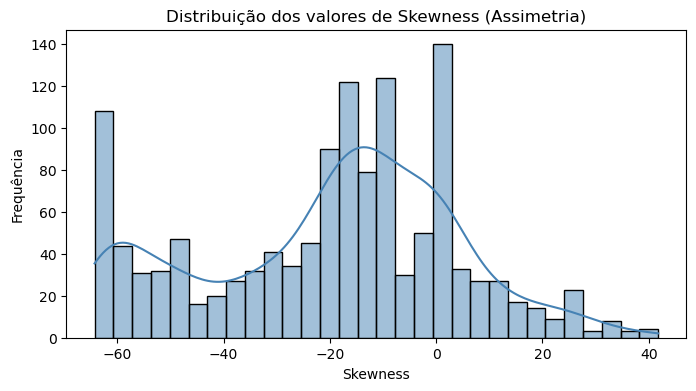

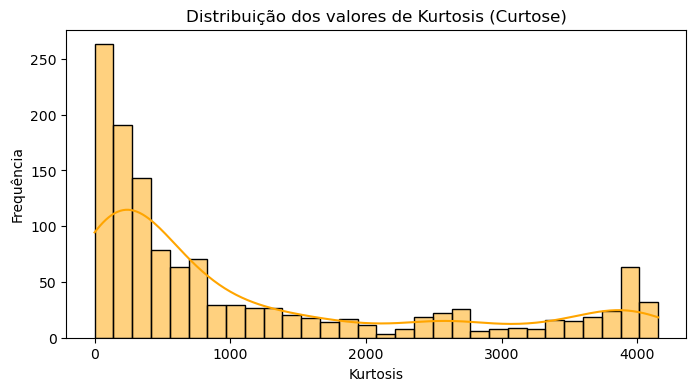

In [169]:
# Histograma de skewness
plt.figure(figsize=(8,4))
sns.histplot(df_forma['skewness'], bins=30, kde=True, color='steelblue')
plt.title('Distribuição dos valores de Skewness (Assimetria)')
plt.xlabel('Skewness')
plt.ylabel('Frequência')
plt.show()

# Histograma de curtose
plt.figure(figsize=(8,4))
sns.histplot(df_forma['kurtosis'], bins=30, kde=True, color='orange')
plt.title('Distribuição dos valores de Kurtosis (Curtose)')
plt.xlabel('Kurtosis')
plt.ylabel('Frequência')
plt.show()

#### Inferência

🧠 **Insight para Modelagem:**  
>A análise da forma da distribuição revelou que a grande maioria das variáveis é fortemente assimétrica (≈90%) e leptocúrtica (≈91%), indicando distribuições não normais com picos agudos e caudas longas.
>
>Essa estrutura é típica de indicadores técnicos de séries financeiras, onde a maior parte das observações se mantém estável, mas há eventos raros e intensos (spikes) que caracterizam oportunidades de reversão ou alta volatilidade.
>
>Portanto, a assimetria e curtose elevadas não indicam erros ou ruídos a serem removidos, mas características intrínsecas da dinâmica de mercado que o modelo deverá aprender.
>
>Para modelagens lineares, recomenda-se aplicar transformações logarítmicas ou escalonamentos robustos.
>
>No caso de Deep Learning (MLP), bastará realizar normalização padrão (StandardScaler ou MinMaxScaler), mantendo as estruturas originais de distribuição.

## 6. Distribuição e Outliers

***Descrição:*** Os outliers são observações que se afastam fortemente do comportamento geral dos dados.
Eles podem representar:
- erros de medição ou inserção (ruído),
- ou eventos raros e legítimos (ex.: disparadas de preço, quedas abruptas, variações de volume em ações).
Detectar outliers não significa removê-los, mas compreender o impacto que eles têm na distribuição — especialmente em bases financeiras, onde esses valores podem representar padrões importantes.

**Objetivo:** Identificar e quantificar a presença de valores extremos em cada variável,
avaliar o grau de contaminação da base e preparar estratégias de tratamento (remoção, truncamento ou normalização robusta).

**Medidas e Visualizações**
| Método                        | Fórmula / Função | Interpretação                                              | Aplicação Prática               |
| ----------------------------- | ---------------- | ---------------------------------------------------------- | ------------------------------- |
| **IQR (Interquartile Range)** | `Q3 - Q1`        | Mede a amplitude do intervalo central de 50% dos dados.    | Base para detectar outliers.    |
| **Limite inferior**           | `Q1 - 1.5 × IQR` | Valores abaixo disso são considerados outliers inferiores. | Detecta valores muito baixos.   |
| **Limite superior**           | `Q3 + 1.5 × IQR` | Valores acima disso são considerados outliers superiores.  | Detecta valores muito altos.    |
| **Z-score (alternativo)**     | `(x - μ)/σ`      | Mede o número de desvios padrão em relação à média.        | Usado em distribuições normais. |

In [170]:
# ==============================================
# 6️⃣ Distribuição e Outliers (IQR)
# ==============================================

# Seleciona as colunas numéricas tratadas
df_num_model = df_main_model.select_dtypes(include=['number']).copy()

# Função para calcular proporção de outliers por coluna
def calcular_outliers(df):
    stats = []
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR

        # Conta valores fora dos limites
        n_outliers = ((df[col] < limite_inf) | (df[col] > limite_sup)).sum()
        prop = (n_outliers / len(df)) * 100

        stats.append([col, Q1, Q3, IQR, limite_inf, limite_sup, n_outliers, prop])

    df_out = pd.DataFrame(stats, columns=[
        'feature', 'Q1', 'Q3', 'IQR', 'limite_inf', 'limite_sup', 'n_outliers', 'porcentagem_outliers'
    ])

    return df_out

# Calcula estatísticas de outliers
df_outliers = calcular_outliers(df_num_model)

# Ordena pelas variáveis com mais outliers
df_outliers_sorted = df_outliers.sort_values('porcentagem_outliers', ascending=False)

# Mostra o top 10
df_outliers_sorted.head(10)

,feature,Q1,Q3,IQR,limite_inf,limite_sup,n_outliers,porcentagem_outliers
254,hammer2y1highlowlow,-0.00000,0.000000,0.000000,-0.000000,0.000000,2057,48.929591
417,hammer3y1highlowvolume,0.00000,0.000000,0.000000,0.000000,0.000000,2057,48.929591
1044,hammer20y20lowhighvolume,0.00000,0.000000,0.000000,0.000000,0.000000,2034,48.382493
696,hammer10y15lowlowvolume,-0.00007,0.000267,0.000338,-0.000577,0.000774,2017,47.978116
855,hammer15y15lowhighvolume,0.00000,0.000000,0.000000,0.000000,0.000000,2001,47.597526
161,hammer1y3volumehighlow,0.00000,0.000000,0.000000,0.000000,0.000000,1992,47.383444
809,hammer15y3volumehighlow,0.00000,0.000000,0.000000,0.000000,0.000000,1988,47.288297
134,hammer1y2volumehighlow,0.00000,0.000000,0.000000,0.000000,0.000000,1987,47.264510
262,hammer2y1lowlowhigh,-0.00000,0.000000,0.000000,-0.000000,0.000000,1986,47.240723
453,hammer3y2lowlowvolume,0.00000,0.000000,0.000000,0.000000,0.000000,1986,47.240723


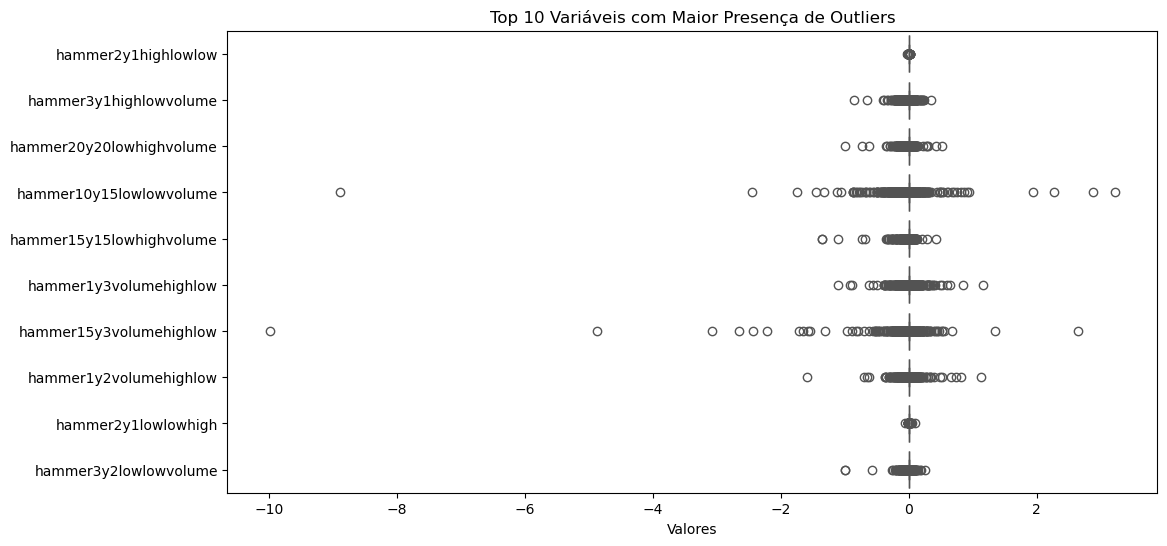

In [171]:
# Top 10 variáveis com mais outliers
top_outliers = df_outliers_sorted.head(10)['feature']

plt.figure(figsize=(12,6))
sns.boxplot(data=df_num_model[top_outliers], orient='h', palette='coolwarm')
plt.title('Top 10 Variáveis com Maior Presença de Outliers')
plt.xlabel('Valores')
plt.show()

#### Inferências

>A análise de outliers revelou um padrão característico de séries financeiras discretizadas, onde a maioria das features apresenta valores nulos ou próximos de zero e raros eventos extremos.
>As métricas de IQR identificaram altas proporções de “outliers” (≈50%), mas, na prática, esses pontos representam sinais técnicos raros e informativos, e não ruído estatístico.
>
>Os boxplots confirmam esse comportamento, com distribuições fortemente concentradas e poucos valores extremos — correspondendo aos momentos de maior volatilidade.
>
>Portanto, não é apropriado eliminar ou truncar esses valores: eles devem ser mantidos e tratados apenas com escalonamento robusto (RobustScaler) antes da modelagem.
>Essa abordagem preserva os picos e eventos anômalos, essenciais para o aprendizado do modelo de Deep Learning.

## 7. Preparação dos Dados para analise

***Descrição:*** Esta etapa consiste em preparar os dados finais para o modelo supervisionado de Deep Learning (MLP).
O foco é padronizar as variáveis numéricas, manter as informações relevantes e separar conjuntos de treino e teste equilibrados, evitando vazamento de informação.

**Objetivo** Garantir que o modelo aprenda de forma robusta, estável e generalizável,
sem ser distorcido por escalas diferentes, colinearidades excessivas ou ruídos.

In [172]:
# =========================================
# Dataset Full (todas as variáveis)
# =========================================
df_full = df_num_model.copy()
X_full = df_full.drop(columns=['TARGET'], errors='ignore')
y_full = df_full['TARGET']

# =========================================
# Dataset Reduzido (variáveis relevantes)
# =========================================
features_relevantes = [
    'INCREMENTO', 'diff', 'D-5', 'stochastic-d-5',
    'stochastic-d-10', 'D-10', 'stochastic-k-10',
    'K-10', 'K-5', 'stochastic-k-5', 'open',
    'RSIvolume15', 'RSIadjclose25'
]

X_reduzido = X_full[features_relevantes].copy()
y_reduzido = y_full.copy()

# =========================================
# Tratamento de inf, NaN e valores extremos
# =========================================
X_full = X_full.replace([np.inf, -np.inf], np.nan)
X_reduzido = X_reduzido.replace([np.inf, -np.inf], np.nan)

X_full = X_full.dropna(axis=1, how='all')
X_full = X_full.fillna(X_full.median())
X_reduzido = X_reduzido.fillna(X_reduzido.median())

# =========================================
# Escalonamento RobustScaler
# =========================================
scaler_full = RobustScaler()
scaler_reduzido = RobustScaler()

X_full_scaled = scaler_full.fit_transform(X_full)
X_reduzido_scaled = scaler_reduzido.fit_transform(X_reduzido)

X_full_scaled = pd.DataFrame(X_full_scaled, columns=X_full.columns)
X_reduzido_scaled = pd.DataFrame(X_reduzido_scaled, columns=X_reduzido.columns)

# =========================================
# Separação Train/Test (80/20)
# =========================================
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full_scaled, y_full, test_size=0.2, random_state=42, stratify=y_full
)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduzido_scaled, y_reduzido, test_size=0.2, random_state=42, stratify=y_reduzido
)

# =========================================
# Verificações
# =========================================
print("=== Dataset Full ===")
print(f"Train shape: {X_train_full.shape}")
print(f"Test shape : {X_test_full.shape}")
print(f"Nº features: {X_train_full.shape[1]}")

print("\n=== Dataset Reduzido ===")
print(f"Train shape: {X_train_red.shape}")
print(f"Test shape : {X_test_red.shape}")
print(f"Nº features: {X_train_red.shape[1]}")


=== Dataset Full ===
Train shape: (3363, 1282)
Test shape : (841, 1282)
Nº features: 1282

=== Dataset Reduzido ===
Train shape: (3363, 13)
Test shape : (841, 13)
Nº features: 13


In [173]:
X_full_scaled.describe()
X_reduzido_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
INCREMENTO,4204.0,0.137364,1.720995,-5.027600,-0.510718,0.000000e+00,0.489282,49.293583
diff,4204.0,-0.014000,10.977873,-121.320036,-0.542857,0.000000e+00,0.457143,171.823952
D-5,4204.0,-0.356250,1.767437,-19.491407,-0.461491,0.000000e+00,0.538509,1.366665
stochastic-d-5,4204.0,-0.356250,1.767437,-19.491407,-0.461491,0.000000e+00,0.538509,1.366665
stochastic-d-10,4204.0,-0.116373,1.136723,-10.874561,-0.403946,0.000000e+00,0.596054,1.323236
D-10,4204.0,-0.116373,1.136723,-10.874561,-0.403946,0.000000e+00,0.596054,1.323236
stochastic-k-10,4204.0,-0.091878,1.067259,-11.384547,-0.411695,-3.165870e-17,0.588305,1.249009
K-10,4204.0,-0.091878,1.067259,-11.384547,-0.411695,-3.165870e-17,0.588305,1.249009
K-5,4204.0,-0.246175,1.528895,-21.327401,-0.426115,0.000000e+00,0.573885,1.177225
stochastic-k-5,4204.0,-0.246175,1.528895,-21.327401,-0.426115,0.000000e+00,0.573885,1.177225


### Criando Dataset com apenas colunas numéricas

In [178]:
# =========================================
# Montagem final dos datasets
# =========================================
df_full_final = X_full_scaled.copy()
df_full_final['TARGET'] = y_full.values

df_reduzido_final = X_reduzido_scaled.copy()
df_reduzido_final['TARGET'] = y_reduzido.values

# =========================================
# Salvando arquivos completos (features + target)
# =========================================
df_full_final.to_csv('../database/processed/dataset_full.csv', index=False)
df_reduzido_final.to_csv('../database/processed/dataset_reduzido.csv', index=False)

print("✅ Bases salvas com sucesso em ../database/processed/")
print(" - dataset_full.csv:", df_full_final.shape)
print(" - dataset_reduzido.csv:", df_reduzido_final.shape)


✅ Bases salvas com sucesso em ../database/processed/
 - dataset_full.csv: (4204, 1283)
 - dataset_reduzido.csv: (4204, 14)


### Criando datasets com as colunas temporais e ações

In [179]:
#import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

# ===========================
# 0) Base de origem
# ===========================
df_full = df_main_model.copy()

# Garantias básicas
assert {'date','ticker','TARGET'}.issubset(df_full.columns), "Faltam colunas: 'date', 'ticker' ou 'TARGET'."

# Tipos corretos das chaves
df_full['date'] = pd.to_datetime(df_full['date'], errors='coerce')
df_full['ticker'] = df_full['ticker'].astype(str)

# Remove linhas sem TARGET
df_full = df_full.dropna(subset=['TARGET']).reset_index(drop=True)

# ===========================
# 1) Diagnóstico de "infs" e não-finitos
# ===========================
num_cols = df_full.select_dtypes(include=['number']).columns.tolist()

# Quais colunas têm ±inf, NaN, ou valores não-finitos?
bad_cols = []
for c in num_cols:
    vals = df_full[c].values
    if not np.isfinite(vals).all():
        bad_cols.append(c)

print(f"Colunas com inf/NaN/não-finitos: {len(bad_cols)}")
print(bad_cols[:20])  # mostra só as 20 primeiras para não poluir

# ===========================
# 2) Limpeza base:
#    - troca ±inf por NaN
#    - remove colunas com NaN demais
#    - imputa mediana nas restantes
# ===========================
# Troca ±inf por NaN
df_full[num_cols] = df_full[num_cols].replace([np.inf, -np.inf], np.nan)

# Percentual de NaN por coluna
nan_ratio = df_full[num_cols].isna().mean()

# Define um limite (ajuste se quiser)
limite_nan = 0.6
cols_drop_nan = nan_ratio[nan_ratio > limite_nan].index.tolist()
if cols_drop_nan:
    print(f"Dropando {len(cols_drop_nan)} colunas com > {int(limite_nan*100)}% NaN.")
    df_full = df_full.drop(columns=cols_drop_nan)
    num_cols = [c for c in num_cols if c not in cols_drop_nan]

# Imputa mediana global (simples e robusto)
df_full[num_cols] = df_full[num_cols].fillna(df_full[num_cols].median())

# Segurança: garante float64 nas numéricas
df_full[num_cols] = df_full[num_cols].apply(pd.to_numeric, errors='coerce').astype('float64')

# Verificação pós-limpeza
still_bad = [c for c in num_cols if not np.isfinite(df_full[c].values).all()]
print("Restaram colunas problemáticas?" , still_bad)

# ===========================
# 3) Apara picos (winsorize leve P1–P99)
#    (evita "valores muito grandes" para float64 e melhora robustez)
# ===========================
q_low = df_full[num_cols].quantile(0.01)
q_hi  = df_full[num_cols].quantile(0.99)
df_full[num_cols] = df_full[num_cols].clip(lower=q_low, upper=q_hi, axis=1)

# ===========================
# 4) Escalonamento ROBUST apenas nas numéricas
# ===========================
scaler = RobustScaler()
df_full[num_cols] = scaler.fit_transform(df_full[num_cols])

# ===========================
# 5) Versão reduzida (features candidatas)
# ===========================
features_relevantes = [
    'INCREMENTO', 'diff', 'D-5', 'stochastic-d-5',
    'stochastic-d-10', 'D-10', 'stochastic-k-10',
    'K-10', 'K-5', 'stochastic-k-5', 'open',
    'RSIvolume15', 'RSIadjclose25'
]
# Garante existência (nem todas podem ter sobrevivido ao drop de colunas ruins)
features_relevantes = [f for f in features_relevantes if f in df_full.columns]

df_reduzido = df_full[['date','ticker','TARGET'] + features_relevantes].copy()

print("Shapes finais -> full:", df_full.shape, "| reduzido:", df_reduzido.shape)

# ===========================
# 6) Salva
# ===========================
df_full.to_csv('../database/processed/dataset_full_cplto.csv', index=False)
df_reduzido.to_csv('../database/processed/dataset_reduzido_cplto.csv', index=False)

print("✔ Bases salvas em ../database/processed")

Colunas com inf/NaN/não-finitos: 3
['mfm', 'mfv', 'adl']
Restaram colunas problemáticas? []
Shapes finais -> full: (4204, 1285) | reduzido: (4204, 16)
✔ Bases salvas em ../database/processed


#### Inferências

Separou-se as bases de dados em 2 bases para testar a performance de modelos de DL

# Conclusão Geral do EDA

O presente notebook teve como objetivo realizar a Análise Exploratória de Dados (EDA) do dataset **`infolimpioavanzadoTarget.csv`**, localizado em `./database/raw`, avaliando sua adequação para o treinamento e teste de modelos de **Deep Learning (DL)** voltados à predição do comportamento de ações listadas na **NASDAQ**.
O objetivo de negócio consiste em **desenvolver um modelo capaz de prever se uma ação terá alta ou queda de 5% em um horizonte de 5 dias úteis**, fornecendo suporte estratégico a decisões de compra e venda.

Durante a análise, observou-se que, embora grande parte das 1.280 features apresentem distribuições **não normais** (com caudas longas à direita e curtose predominantemente **leptocúrtica – 91%**), o conjunto de dados revelou **relações significativas de correlação entre variáveis e com o TARGET**.
Dentre todas as variáveis avaliadas, destacaram-se como mais relevantes para o modelo:

> `INCREMENTO`, `diff`, `D-5`, `stochastic-d-5`, `stochastic-d-10`, `D-10`,
> `stochastic-k-10`, `K-10`, `K-5`, `stochastic-k-5`, `open`, `RSIvolume15`, `RSIadjclose25`

com **INCREMENTO** apresentando a correlação mais expressiva e estatisticamente significativa com o TARGET (r = 0.53, p < 0.001).

Para investigar o impacto da seleção de variáveis na performance dos modelos de aprendizado, foram criadas duas amostras independentes:

| Dataset                    | Descrição                                                                                        | Nº Features | Objetivo                                                                                                          |
| -------------------------- | ------------------------------------------------------------------------------------------------ | ----------- | ----------------------------------------------------------------------------------------------------------------- |
| **`dataset_full.csv`**     | Contém todas as features numéricas originais (tratadas e escalonadas).                           | 1282        | Avaliar o poder total de explicação do conjunto completo.                                                         |
| **`dataset_reduzido.csv`** | Contém apenas as 13 features mais relevantes identificadas via correlação e análise estatística. | 13          | Verificar se um subconjunto reduzido mantém o mesmo poder preditivo, favorecendo desempenho e interpretabilidade. |

Ambos os datasets foram escalonados via **RobustScaler**, particionados em treino e teste (80/20, estratificado pelo TARGET) e salvos em `./database/processed/` para uso nas próximas fases.

---

## Interpretação e Próximos Passos

Com base nos resultados, conclui-se que:

1. O dataset é **estatisticamente adequado para modelagem**, apesar das assimetrias e colinearidades observadas.
2. As variáveis-chave identificadas possuem **relação direta com o comportamento de variação de preço (TARGET)** e serão testadas como preditores primários.
3. A presença de múltiplas variáveis derivadas (RSI, MACD, Stochastic) reforça a **robustez do sinal técnico**, mas requer controle de colinearidade e regularização na etapa de modelagem.

Os próximos passos contemplam:

1. **Imputação e normalização finais**, assegurando estabilidade para o treinamento de redes neurais.
2. **Treinamento e comparação de modelos DL**, seguindo o roteiro do professor Diego Menescal:

   * Modelos: MLP (baseline), CNN e LSTM.
   * Métricas: Accuracy, Precision, Recall, F1-score, ROC-AUC e RMSE (para análise de erro).
   * Estratégias: Early stopping, regularização e thresholding otimizado.
3. **Comparativo de desempenho entre dataset_full e dataset_reduzido**, determinando qual configuração entrega o melhor equilíbrio entre performance e interpretabilidade.

---

## Observação metodológica

O pipeline seguirá as melhores práticas de Machine Learning e Deep Learning supervisionado, com ênfase nos princípios:

| Etapa                       | Propósito                                             |
| --------------------------- | ----------------------------------------------------- |
| **1. Imputação correta**    | Evitar viés por dados faltantes.                      |
| **2. Feature engineering**  | Melhorar poder preditivo sem inflar dimensionalidade. |
| **3. Codificação adequada** | Preparar variáveis conforme o contexto.               |
| **4. Validação rigorosa**   | Garantir generalização (Stratified K-Fold).           |
| **5. Thresholding**         | Ajustar ponto de corte conforme métrica de negócio.   |

---

### Conclusão Final

O EDA comprovou que o dataset é **robusto, informativo e adequado** para a construção de modelos de Deep Learning capazes de capturar padrões temporais e técnicos de comportamento das ações.
As bases tratadas (`dataset_full.csv` e `dataset_reduzido.csv`) constituem o **marco de transição entre a fase de Análise Exploratória e a de Modelagem**, que será abordada na próxima etapa do projeto.

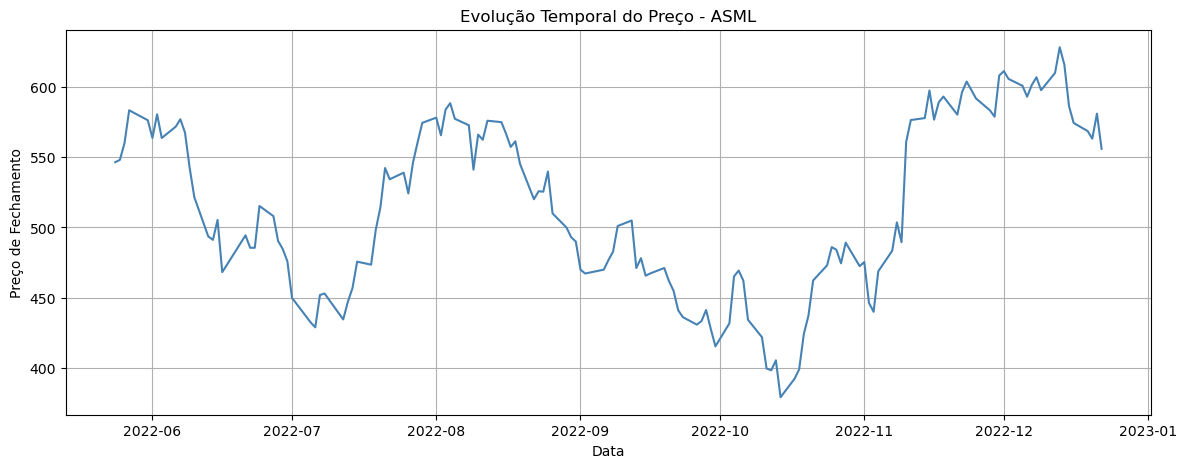

In [176]:
# Exemplo: comportamento temporal da ASML
ticker_exemplo = 'ASML'
df_ticker = df_main[df_main['ticker'] == ticker_exemplo]

plt.figure(figsize=(14,5))
plt.plot(df_ticker['date'], df_ticker['close'], color='steelblue', linewidth=1.5)
plt.title(f"Evolução Temporal do Preço - {ticker_exemplo}")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.grid(True)
plt.show()


In [177]:
df_main_model

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
98,2022-05-24,13.810000,14.120000,13.610000,14.100000,14.100000,74700,ASLE,47.575179,48.098729,...,15.09,57.142875,47.186159,57.142875,47.186159,9.956716,0.644521,-0.060000,-0.423732,0
99,2022-05-25,14.100000,14.320000,14.050000,14.180000,14.180000,71400,ASLE,48.459097,47.832464,...,14.76,70.707082,59.066871,70.707082,59.066871,11.640211,0.616048,0.210000,1.503221,0
100,2022-05-26,14.120000,14.347000,13.790000,13.820000,13.820000,89700,ASLE,44.815889,49.493682,...,14.76,52.525237,60.125065,52.525237,60.125065,-7.599827,0.773943,0.510000,3.831707,0
101,2022-05-27,14.010000,14.250000,13.940000,14.110000,14.110000,84800,ASLE,48.178500,49.045623,...,14.76,67.171696,63.468005,67.171696,63.468005,3.703691,0.731665,0.060000,0.427049,0
102,2022-05-31,14.140000,14.140000,13.530000,13.860000,13.860000,315400,ASLE,45.611408,65.015137,...,14.76,52.127632,57.274855,52.127632,57.274855,-5.147223,2.721311,0.750000,5.720824,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,ATLO,45.827378,48.222673,...,23.60,-26.417248,-17.134822,-26.417248,-17.134822,-9.282426,0.938776,0.604294,2.811801,0
7772,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,ATLO,44.016221,69.143430,...,23.60,-28.900837,-23.695948,-28.900837,-23.695948,-5.204889,9.836735,0.730997,3.432489,0
7773,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,ATLO,51.113614,49.069797,...,23.60,-9.727156,-21.681747,-9.727156,-21.681747,11.954591,1.428571,0.497078,2.283919,0
7774,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,ATLO,61.385254,47.701266,...,23.60,27.821310,-3.602228,27.821310,-3.602228,31.423537,0.653061,0.292400,1.303786,0
